# Capstone Project - Telecommunication Networking in Canada


## 1. Connecting with MS SQL & Importing the Dataset from SQL

In [1]:
import pandas as pd
import pyodbc 
import seaborn as sns
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Building Connection with MS SQL SERVER -  Pyodbc Library 

In [2]:
connection = pyodbc.connect('Driver={SQL Server};'
                      'Server=WORKSPACE\SQLEXPRESS;'
                      'Database=CMDB_DESK;'
                      'Trusted_Connection=yes;')

### Building Connection with MS SQL SERVER - SQL ALCHEMY Library

In [3]:
SERVER='WORKSPACE\SQLEXPRESS'
DATABASE='CMDB_DESK'
DRIVER='SQL Server'
DATABASE_CONNECTION = f'mssql://{SERVER}/{DATABASE}?driver={DRIVER}'

In [4]:
engine = create_engine(DATABASE_CONNECTION)
conn = engine.connect()

In [5]:
# Importing Spectrum Dataset form SQL
df = pd.read_sql_query('SELECT * FROM [dbo].[Site Data Final Updated 17]', conn)

print(df)

print(type(df))

      NEW_ACCOUNT      NEW_LICNO OLD_ACCOUNT      OLD_LICNO  \
0      7091901565  010286041-001  7091901565  010286041-001   
1      7091901565  010286041-001  7091901565  010286041-001   
2      7091901565  010286041-001  7091901565  010286041-001   
3      7091901565  010286041-001  7091901565  010286041-001   
4      7091901565  010286041-001  7091901565  010286041-001   
...           ...            ...         ...            ...   
77759  7091901565  010286041-001  7091901565  010286041-001   
77760  7091901565  010286041-001  7091901565  010286041-001   
77761  7091901565  010286041-001  7091901565  010286041-001   
77762  7091901565  010286041-001  7091901565  010286041-001   
77763  7091901565  010286041-001  7091901565  010286041-001   

                 LICENSEE SERVICE TRANSMIT_FREQ(MHz) RECEIVE_FREQ(MHz)  \
0      Bell Mobility Inc.    CELL              882.4             837.4   
1      Bell Mobility Inc.    CELL              882.4             837.4   
2      Bell Mobility 

In [6]:
# Importing Census Dataset form SQL
df1 = pd.read_sql_query('SELECT * FROM [dbo].[City Zip_Updated 22 July]', conn)

print(df1)

print(type(df1))

              City PROV         Provience  Zip POPULATION
0       Acton Vale   QC            Quebec  J0H       7664
1             Amos   QC            Quebec  J9T      12823
2           Amulet   QC            Quebec  J9X      42334
3           Amulet   QC            Quebec  J9Y      42334
4     Beaconsfield   QC            Quebec  H9W      19115
...            ...  ...               ...  ...        ...
4037       Saanich   BC  British Columbia  V9A     117735
4038       Saanich   BC  British Columbia  V8Z     117735
4039       Saanich   BC  British Columbia  V8X     117735
4040       Saanich   BC  British Columbia  V8R     117735
4041       Saanich   BC  British Columbia  V8P     117735

[4042 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>


## 2. Data Preprocessing

In [7]:
pd.set_option('display.max_columns', None)
df.head()
df.tail()

,NEW_ACCOUNT,NEW_LICNO,OLD_ACCOUNT,OLD_LICNO,LICENSEE,SERVICE,TRANSMIT_FREQ(MHz),RECEIVE_FREQ(MHz),TRANSMIT_LOWER,TRANSMIT_UPPER,TRANSMIT_BW(MHz),LOCATION,LATITUDE,LONGITUDE,COMPLETE ADDRESS,City,PROV,Zip,Country,SITE_ELEV,STUCT_HT,TX_MFR,TX_MODEL,TX_PWR,TX_PWR(dBm),TX_PWR_TYPE,BW_EMISSION,TX_ANT_MFR,TX_ANT_MODEL,TX_ANT_HT,Distance(Km),Area of Reach( Sq Km),TX_ANT_AZIM,TX_ANT_ELEV_ANGLE,TX_ANT_GAIN,TX_ANT_DIRECTIONAL,TX_LINE_LOSS,ZONE_ENHANCER,LAST_MOD_DATE,LAST_UPLOAD_DATE
0,7091901565,010286041-001,7091901565,010286041-001,Bell Mobility Inc.,CELL,882.4,837.4,882.4,,4.15,J0441-216 LUCAS BR,45.40026944,-61.53785278,"2-208 Lucas Branch Rd, Guysborough, NS B0H 1N0...",Fox Island Main,NS,B0H,CA,139,86,P3,6369A-3804B5,3007.1234,64.7815125,I,4M15G7W,D9,BXA_70040_8CF_EDIN_0,86,33.18,104.27,0,0,18,D,1,,10/12/2013,30/04/2022
1,7091901565,010286041-001,7091901565,010286041-001,Bell Mobility Inc.,CELL,882.4,837.4,882.4,,4.15,J0451-6126 HIGHWAY 329,44.52549167,-64.08083056,"Hubbards, NS B0J 1T0, Canada",Fox Island Main,NS,B0J,CA,107,78,P3,6369A-3804B5,771.1187,58.87121235,I,4M15G7W,3,FFV4_65C_R6,72,30.36,95.41,60,0,15.1,D,1,,30/08/2021,30/04/2022
2,7091901565,010286041-001,7091901565,010286041-001,Bell Mobility Inc.,CELL,882.4,837.4,882.4,,4.15,J0683-16 YANKEETOWN ROAD,44.73194722,-63.8017,"44 Hammonds Plains Rd, Hammonds Plains, NS B3Z...",Halifax,NS,B3Z,CA,152,78,P3,6369A-3805B5,295.8217,54.71030028,I,4M15G7W,3,FFV4_65A_R6,65,28.84,90.65,5,2,12.7,D,1,,10/12/2013,30/04/2022
3,7091901565,010286041-001,7091901565,010286041-001,Bell Mobility Inc.,CELL,882.4,837.4,882.4,,4.15,J0602-75 TINY PARRISH RD,45.09354167,-64.45525833,"90-246 Tiny Parish Rd, Port Williams, NS B0P 1...",Kentville,NS,B4N,CA,52,53,P3,6369A-3942B5,1556.1806,61.92059997,I,4M15G7W,3,LNX_6515DS_A1M,53.2,26.1,82.01,290,0,16.9,D,1,,21/02/2017,30/04/2022
4,7091901565,010286041-001,7091901565,010286041-001,Bell Mobility Inc.,CELL,887.5,842.5,887.5,,5,J0481-302 HARMONY ROAD,44.94000556,-64.90545,"304 Harmony Rd, Kingston, NS B0P 1R0, Canada",Fox Island Main,NS,B0P,CA,159,77,P3,SKU22121,1125.8334,60.51474129,I,5M00W7W,3,FFV4_65C_R6,76.6,31.31,98.41,340,0,15.1,D,1,,21/10/2021,30/04/2022


,NEW_ACCOUNT,NEW_LICNO,OLD_ACCOUNT,OLD_LICNO,LICENSEE,SERVICE,TRANSMIT_FREQ(MHz),RECEIVE_FREQ(MHz),TRANSMIT_LOWER,TRANSMIT_UPPER,TRANSMIT_BW(MHz),LOCATION,LATITUDE,LONGITUDE,COMPLETE ADDRESS,City,PROV,Zip,Country,SITE_ELEV,STUCT_HT,TX_MFR,TX_MODEL,TX_PWR,TX_PWR(dBm),TX_PWR_TYPE,BW_EMISSION,TX_ANT_MFR,TX_ANT_MODEL,TX_ANT_HT,Distance(Km),Area of Reach( Sq Km),TX_ANT_AZIM,TX_ANT_ELEV_ANGLE,TX_ANT_GAIN,TX_ANT_DIRECTIONAL,TX_LINE_LOSS,ZONE_ENHANCER,LAST_MOD_DATE,LAST_UPLOAD_DATE
77759,7091901565,010286041-001,7091901565,010286041-001,Bell Mobility Inc.,CELL,882.4,837.4,882.4,,4.15,J0642-23 BAY ST LAWRENCE RD,46.88489444,-60.50996389,"5 Bay St Lawrence Rd, Cape North, NS B0C 1G0, ...",Fox Island Main,NS,B0C,CA,97,57,P3,RRU 3804,1343.2327,61.28151256,I,4M15G7W,D9,BXA-80063-6CF,57,27.01,84.89,110,0,14.5,D,1,,10/12/2013,30/04/2022
77760,7091901565,010286041-001,7091901565,010286041-001,Bell Mobility Inc.,CELL,882.4,837.4,882.4,,4.15,J0699-3660 HIGHWAY 7,44.7304,-63.3611,"3660 Nova Scotia Trunk 7, Lake Echo, NS B3E 1C...",Halifax,NS,B3E,CA,62,57,B8,KRC161749/1,771.1187,58.87121235,I,4M15G7W,3,FFV4_65C_R6,57,27.01,84.89,305,0,15.1,D,1,,10/12/2013,30/04/2022
77761,7091901565,010286041-001,7091901565,010286041-001,Bell Mobility Inc.,CELL,882.4,837.4,882.4,,4.15,J0575-27 STONEYBROOK COURT,44.6624,-63.6383,"32 Stoney Brook Ct, Halifax, NS B3M 3L1, Canada",Halifax,NS,B3M,CA,35,39,B8,KRC161749/1,331.9174,55.2103002,I,4M15G7W,3,RRZZHHTT-65A-R6H4,32.2,20.3,63.81,215,0,13.2,D,1,,10/12/2013,30/04/2022
77762,7091901565,010286041-001,7091901565,010286041-001,Bell Mobility Inc.,CELL,882.4,837.4,882.4,,4.15,J0462-750 HANSFORD ROAD,45.71927778,-63.80607222,"Oxford, NS B0M 1P0, Canada",Fox Island Main,NS,B0M,CA,104,89,P3,6369A-3942B5,753.5659,58.77121238,I,4M15G7W,D9,BXA_80080_8CF_EDIN_0,89,33.75,106.08,110,0,15,D,1,,4/07/2019,30/04/2022
77763,7091901565,010286041-001,7091901565,010286041-001,Bell Mobility Inc.,CELL,882.4,837.4,882.4,,4.15,J0413-1600 BEDFORD HIGHWAY,44.7331,-63.6564,"Bedford Hwy Before Dartmouth Rd (6270), Bedfor...",Halifax,NS,B4A,CA,8,24,B8,KRC161749/1,295.8217,54.71030028,I,4M15G7W,3,FFV4_65A_R6,22.6,17.01,53.45,120,0,12.7,D,1,,15/10/2021,30/04/2022


In [8]:
pd.set_option('display.max_columns', None)
df1.head()
df1.tail()

,City,PROV,Provience,Zip,POPULATION
0,Acton Vale,QC,Quebec,J0H,7664
1,Amos,QC,Quebec,J9T,12823
2,Amulet,QC,Quebec,J9X,42334
3,Amulet,QC,Quebec,J9Y,42334
4,Beaconsfield,QC,Quebec,H9W,19115


,City,PROV,Provience,Zip,POPULATION
4037,Saanich,BC,British Columbia,V9A,117735
4038,Saanich,BC,British Columbia,V8Z,117735
4039,Saanich,BC,British Columbia,V8X,117735
4040,Saanich,BC,British Columbia,V8R,117735
4041,Saanich,BC,British Columbia,V8P,117735


In [9]:
print('The df dataset contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))
df.info()

The df dataset contains 77764 rows and 40 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77764 entries, 0 to 77763
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NEW_ACCOUNT             77764 non-null  object
 1   NEW_LICNO               77764 non-null  object
 2   OLD_ACCOUNT             77764 non-null  object
 3   OLD_LICNO               77764 non-null  object
 4   LICENSEE                77764 non-null  object
 5   SERVICE                 77764 non-null  object
 6   TRANSMIT_FREQ(MHz)      77764 non-null  object
 7   RECEIVE_FREQ(MHz)       77764 non-null  object
 8   TRANSMIT_LOWER          77764 non-null  object
 9   TRANSMIT_UPPER          77764 non-null  object
 10  TRANSMIT_BW(MHz)        77764 non-null  object
 11  LOCATION                77764 non-null  object
 12  LATITUDE                77764 non-null  object
 13  LONGITUDE               77764 non-null  object
 14  COMP

In [10]:
print('The df1 dataset contains {} rows and {} columns'.format(df1.shape[0], df1.shape[1]))
df1.info()

The df1 dataset contains 4042 rows and 5 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        4042 non-null   object
 1   PROV        4042 non-null   object
 2   Provience   4042 non-null   object
 3   Zip         4042 non-null   object
 4   POPULATION  4042 non-null   object
dtypes: object(5)
memory usage: 158.0+ KB


In [11]:
df.describe()

,NEW_ACCOUNT,NEW_LICNO,OLD_ACCOUNT,OLD_LICNO,LICENSEE,SERVICE,TRANSMIT_FREQ(MHz),RECEIVE_FREQ(MHz),TRANSMIT_LOWER,TRANSMIT_UPPER,TRANSMIT_BW(MHz),LOCATION,LATITUDE,LONGITUDE,COMPLETE ADDRESS,City,PROV,Zip,Country,SITE_ELEV,STUCT_HT,TX_MFR,TX_MODEL,TX_PWR,TX_PWR(dBm),TX_PWR_TYPE,BW_EMISSION,TX_ANT_MFR,TX_ANT_MODEL,TX_ANT_HT,Distance(Km),Area of Reach( Sq Km),TX_ANT_AZIM,TX_ANT_ELEV_ANGLE,TX_ANT_GAIN,TX_ANT_DIRECTIONAL,TX_LINE_LOSS,ZONE_ENHANCER,LAST_MOD_DATE,LAST_UPLOAD_DATE
count,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764,77764
unique,11,81,11,81,12,1,81,81,69,50,33,14134,12707,12730,11222,599,13,1466,1,1193,187,10,84,4769,4769,1,23,27,1323,1183,1182,1183,308,77,126,2,96,3,1765,20
top,7091901349,010285643-001,91901349,010285643-001,Rogers Communications Canada Inc.,CELL,877.5,832.5,877.5,,5,TBD,43.63453333,-79.42885833,"Fort Mackay, AB T0P 1C0, Canada",Toronto,ON,S0G,CA,90,30,B8,RADIO 4478,591.6434,57.72060024,I,5M00V7WEC,3,FFV4_65A_R6,30,19.6,61.59,0,0,13.3,D,1,,22/04/2022,22/04/2022
freq,39050,14942,39050,14942,39050,77764,15734,15734,15734,68758,39294,36,35,35,83,9186,39323,544,77764,631,2960,43791,20879,2354,2354,77764,17711,31709,5571,890,890,890,6891,27319,8912,72822,31964,76722,23638,23569


In [12]:
df1.describe()

,City,PROV,Provience,Zip,POPULATION
count,4042,4042,4042,4042,4042
unique,600,13,13,1466,543
top,Toronto,ON,Ontario,K0B,5429524
freq,288,1481,1481,6,288


### 2.1 Check Duplicate Values

In [13]:
print('Duplicates in df dataset : ',sum(df.duplicated()))

Duplicates in df dataset :  0


In [14]:
print('Duplicates in df1 dataset : ',sum(df1.duplicated()))

Duplicates in df1 dataset :  2573


In [15]:
df1 =df1.drop_duplicates()

In [16]:
print('Now... Duplicates in df1 dataset : ',sum(df1.duplicated()))

Now... Duplicates in df1 dataset :  0


### 2.2 Check Missing Values

In [17]:
print('Total number of missing values in df data : ', df.isnull().values.sum())

Total number of missing values in df data :  0


In [18]:
print('Total number of missing values in df1 data : ', df1.isnull().values.sum())

Total number of missing values in df1 data :  0


### 2.3 Check for Class Imbalance

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Cell Towers via LICENSEE')

<AxesSubplot:title={'center':'Cell Towers via LICENSEE'}, xlabel='count', ylabel='LICENSEE'>

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

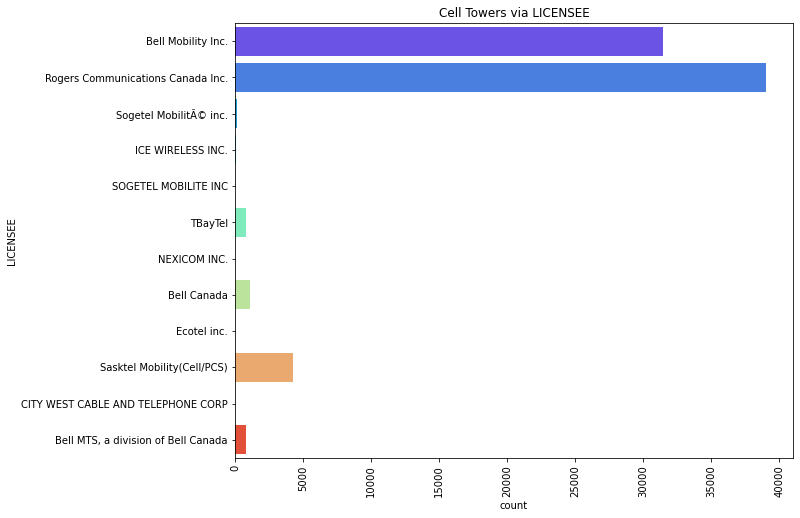

In [19]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

plt.figure(figsize=(10,8))
plt.title('Cell Towers via LICENSEE')
sns.countplot(y=df.LICENSEE, palette='rainbow')
plt.xticks(rotation=90)

In [20]:
#df1.rename(columns = {'PROV':'Provience',"State":"PROV"}, 
            #inplace = True)

  
# displaying the DataFrame
#print(df1)

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Census Dataset Records via Provience')

<AxesSubplot:title={'center':'Census Dataset Records via Provience'}, xlabel='count', ylabel='Provience'>

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

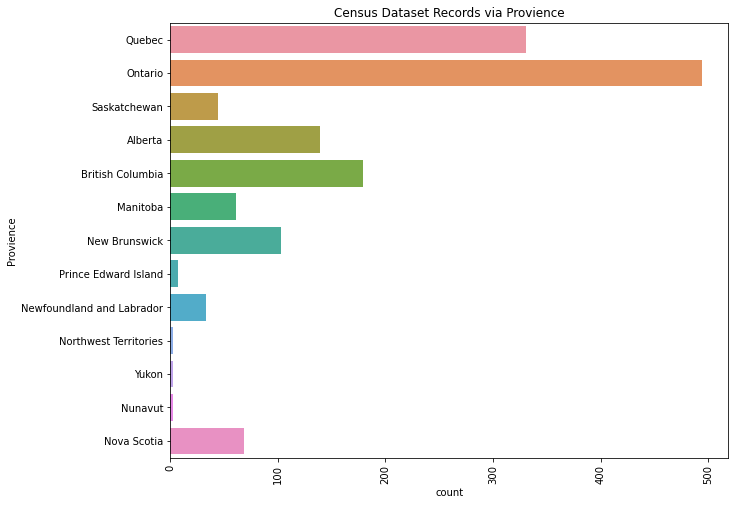

In [21]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

plt.figure(figsize=(10,8))
plt.title('Census Dataset Records via Provience')
sns.countplot(y=df1.Provience)
plt.xticks(rotation=90)

## 3. Data Manuplation

In [22]:
# printing column names(SPECTRUM DATASET)
df.columns
df1.columns

Index(['NEW_ACCOUNT', 'NEW_LICNO', 'OLD_ACCOUNT', 'OLD_LICNO', 'LICENSEE',
       'SERVICE', 'TRANSMIT_FREQ(MHz)', 'RECEIVE_FREQ(MHz)', 'TRANSMIT_LOWER',
       'TRANSMIT_UPPER', 'TRANSMIT_BW(MHz)', 'LOCATION', 'LATITUDE',
       'LONGITUDE', 'COMPLETE ADDRESS ', 'City', 'PROV', 'Zip', 'Country',
       'SITE_ELEV', 'STUCT_HT', 'TX_MFR', 'TX_MODEL', 'TX_PWR', 'TX_PWR(dBm)',
       'TX_PWR_TYPE', 'BW_EMISSION', 'TX_ANT_MFR', 'TX_ANT_MODEL', 'TX_ANT_HT',
       'Distance(Km)', 'Area of Reach( Sq  Km)', 'TX_ANT_AZIM',
       'TX_ANT_ELEV_ANGLE', 'TX_ANT_GAIN', 'TX_ANT_DIRECTIONAL',
       'TX_LINE_LOSS', 'ZONE_ENHANCER', 'LAST_MOD_DATE', 'LAST_UPLOAD_DATE'],
      dtype='object')

Index(['City', 'PROV', 'Provience', 'Zip', 'POPULATION'], dtype='object')

In [23]:
data=df
data1=df1

In [24]:
data.columns

Index(['NEW_ACCOUNT', 'NEW_LICNO', 'OLD_ACCOUNT', 'OLD_LICNO', 'LICENSEE',
       'SERVICE', 'TRANSMIT_FREQ(MHz)', 'RECEIVE_FREQ(MHz)', 'TRANSMIT_LOWER',
       'TRANSMIT_UPPER', 'TRANSMIT_BW(MHz)', 'LOCATION', 'LATITUDE',
       'LONGITUDE', 'COMPLETE ADDRESS ', 'City', 'PROV', 'Zip', 'Country',
       'SITE_ELEV', 'STUCT_HT', 'TX_MFR', 'TX_MODEL', 'TX_PWR', 'TX_PWR(dBm)',
       'TX_PWR_TYPE', 'BW_EMISSION', 'TX_ANT_MFR', 'TX_ANT_MODEL', 'TX_ANT_HT',
       'Distance(Km)', 'Area of Reach( Sq  Km)', 'TX_ANT_AZIM',
       'TX_ANT_ELEV_ANGLE', 'TX_ANT_GAIN', 'TX_ANT_DIRECTIONAL',
       'TX_LINE_LOSS', 'ZONE_ENHANCER', 'LAST_MOD_DATE', 'LAST_UPLOAD_DATE'],
      dtype='object')

In [25]:
# dropping the unnecessery attribute from dataset
data = df.drop(labels= ['NEW_ACCOUNT', 'NEW_LICNO', 'OLD_ACCOUNT', 'OLD_LICNO',
       'TRANSMIT_LOWER','TRANSMIT_UPPER', 'TRANSMIT_BW(MHz)', 'LOCATION', 'COMPLETE ADDRESS ',
       'SITE_ELEV', 'STUCT_HT', 'TX_MFR', 'TX_MODEL', 'TX_PWR', 'TX_PWR(dBm)',
       'TX_PWR_TYPE', 'BW_EMISSION', 'TX_ANT_MFR', 'TX_ANT_MODEL', 'TX_ANT_HT',
       'TX_ANT_AZIM',
       'TX_ANT_ELEV_ANGLE', 'TX_ANT_GAIN', 'TX_ANT_DIRECTIONAL',
       'TX_LINE_LOSS', 'ZONE_ENHANCER', 'LAST_MOD_DATE'], axis = 1)

In [26]:
data.info()
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77764 entries, 0 to 77763
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   LICENSEE                77764 non-null  object
 1   SERVICE                 77764 non-null  object
 2   TRANSMIT_FREQ(MHz)      77764 non-null  object
 3   RECEIVE_FREQ(MHz)       77764 non-null  object
 4   LATITUDE                77764 non-null  object
 5   LONGITUDE               77764 non-null  object
 6   City                    77764 non-null  object
 7   PROV                    77764 non-null  object
 8   Zip                     77764 non-null  object
 9   Country                 77764 non-null  object
 10  Distance(Km)            77764 non-null  object
 11  Area of Reach( Sq  Km)  77764 non-null  object
 12  LAST_UPLOAD_DATE        77764 non-null  object
dtypes: object(13)
memory usage: 7.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469 entries, 0 to 1

In [27]:
data.head()
data1.head()

,LICENSEE,SERVICE,TRANSMIT_FREQ(MHz),RECEIVE_FREQ(MHz),LATITUDE,LONGITUDE,City,PROV,Zip,Country,Distance(Km),Area of Reach( Sq Km),LAST_UPLOAD_DATE
0,Bell Mobility Inc.,CELL,882.4,837.4,45.40026944,-61.53785278,Fox Island Main,NS,B0H,CA,33.18,104.27,30/04/2022
1,Bell Mobility Inc.,CELL,882.4,837.4,44.52549167,-64.08083056,Fox Island Main,NS,B0J,CA,30.36,95.41,30/04/2022
2,Bell Mobility Inc.,CELL,882.4,837.4,44.73194722,-63.8017,Halifax,NS,B3Z,CA,28.84,90.65,30/04/2022
3,Bell Mobility Inc.,CELL,882.4,837.4,45.09354167,-64.45525833,Kentville,NS,B4N,CA,26.1,82.01,30/04/2022
4,Bell Mobility Inc.,CELL,887.5,842.5,44.94000556,-64.90545,Fox Island Main,NS,B0P,CA,31.31,98.41,30/04/2022


,City,PROV,Provience,Zip,POPULATION
0,Acton Vale,QC,Quebec,J0H,7664
1,Amos,QC,Quebec,J9T,12823
2,Amulet,QC,Quebec,J9X,42334
3,Amulet,QC,Quebec,J9Y,42334
4,Beaconsfield,QC,Quebec,H9W,19115


In [28]:
data.columns

Index(['LICENSEE', 'SERVICE', 'TRANSMIT_FREQ(MHz)', 'RECEIVE_FREQ(MHz)',
       'LATITUDE', 'LONGITUDE', 'City', 'PROV', 'Zip', 'Country',
       'Distance(Km)', 'Area of Reach( Sq  Km)', 'LAST_UPLOAD_DATE'],
      dtype='object')

In [29]:
data['LATITUDE'] = data['LATITUDE'].astype('float')
data['LONGITUDE'] = data['LONGITUDE'].astype('float')
data['Distance(Km)'] = data['Distance(Km)'].astype('float')
data['Area of Reach( Sq  Km)'] = data['Area of Reach( Sq  Km)'].astype('float')
data['LICENSEE'] = data['LICENSEE'].astype('category')
data['City'] = data['City'].astype('category')
data['PROV'] = data['PROV'].astype('category')
data['Zip'] = data['Zip'].astype('category')
data['LAST_UPLOAD_DATE'] = data['LAST_UPLOAD_DATE'].astype('datetime64[ns]')

In [30]:
data.describe()

,LATITUDE,LONGITUDE,Distance(Km),Area of Reach( Sq Km)
count,77764.000000,77764.000000,77764.000000,77764.000000
mean,46.699894,-86.776812,24.685390,77.582484
std,3.604184,17.388228,7.133068,22.419112
min,41.816111,-140.878608,3.580000,11.240000
25%,43.761339,-97.644444,19.560000,61.480000
50%,45.474489,-79.619897,23.680000,74.420000
75%,49.243938,-77.343544,30.080000,94.550000
max,76.420000,-52.685000,48.270000,151.690000


In [31]:
data1.columns

Index(['City', 'PROV', 'Provience', 'Zip', 'POPULATION'], dtype='object')

In [32]:
data1['City'] = data1['City'].astype('category')
data1['PROV'] = data1['PROV'].astype('category')
data1['Zip'] = data1['Zip'].astype('category')
data1['Provience'] = data1['Provience'].astype('category')
data1['POPULATION'] = data1['POPULATION'].astype('int')

In [33]:
# dropping the unnecessery attribute from dataset
data1 = data1.drop(labels= [ 'Zip' ], axis = 1)
data1

,City,PROV,Provience,POPULATION
0,Acton Vale,QC,Quebec,7664
1,Amos,QC,Quebec,12823
2,Amulet,QC,Quebec,42334
3,Amulet,QC,Quebec,42334
4,Beaconsfield,QC,Quebec,19115
...,...,...,...,...
1464,Wolfville,NS,Nova Scotia,4195
1465,Bridgewater,NS,Nova Scotia,8532
1466,Yarmouth,NS,Nova Scotia,6518
1467,Murrays Siding,NS,Nova Scotia,1455


In [34]:
((data["LICENSEE"]).unique())

['Bell Mobility Inc.', 'Rogers Communications Canada Inc.', 'Sogetel MobilitÃ© inc.', 'ICE WIRELESS INC.', 'SOGETEL MOBILITE INC', ..., 'Bell Canada', 'Ecotel inc.', 'Sasktel Mobility(Cell/PCS)', 'CITY WEST CABLE AND TELEPHONE CORP', 'Bell MTS, a division of Bell Canada']
Length: 12
Categories (12, object): ['Bell Canada', 'Bell MTS, a division of Bell Canada', 'Bell Mobility Inc.', 'CITY WEST CABLE AND TELEPHONE CORP', ..., 'SOGETEL MOBILITE INC', 'Sasktel Mobility(Cell/PCS)', 'Sogetel MobilitÃ© inc.', 'TBayTel']

In [35]:
# Renaming Specific Column Values for better understanding & grouping 
data['LICENSEE'] = data['LICENSEE'].replace(['Bell MTS, a division of Bell Canada','Bell Mobility Inc.'],'Bell Canada')
data['LICENSEE'] = data['LICENSEE'].replace(['Sogetel MobilitÃ© inc.'],'Sasktel Mobility(Cell/PCS)')

<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Cell Towers via LICENSEE ')

<AxesSubplot:title={'center':'Cell Towers via LICENSEE '}, xlabel='count', ylabel='LICENSEE'>

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

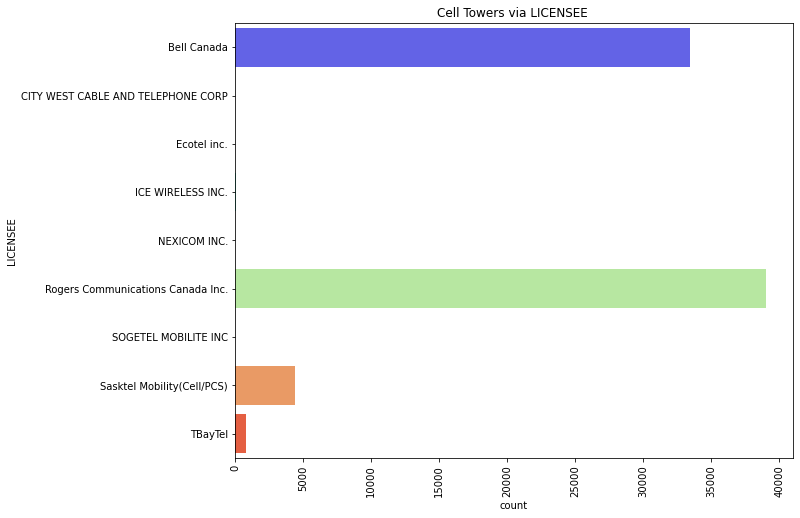

In [36]:
import seaborn as sns
plt.figure(figsize=(10,8))
plt.title('Cell Towers via LICENSEE ')
sns.countplot(y=data.LICENSEE, palette='rainbow')
plt.xticks(rotation=90)

In [37]:
data.groupby(['LICENSEE']).mean()


,LATITUDE,LONGITUDE,Distance(Km),Area of Reach( Sq Km)
LICENSEE,,,,
Bell Canada,45.447321,-78.461445,25.017313,78.625456
CITY WEST CABLE AND TELEPHONE CORP,54.302060,-130.311551,14.764167,46.403333
Ecotel inc.,52.222321,-67.652551,17.495556,54.980000
ICE WIRELESS INC.,63.096970,-105.412405,16.735341,52.598409
NEXICOM INC.,44.194400,-78.485357,31.967500,100.470000
Rogers Communications Canada Inc.,47.141130,-91.750761,23.894590,75.096883
SOGETEL MOBILITE INC,45.578487,-71.666727,33.628000,105.676000
Sasktel Mobility(Cell/PCS),51.607857,-104.849013,29.775560,93.584301
TBayTel,48.672496,-90.153581,22.371873,70.308797


In [38]:
data1.head()
data1.shape

,City,PROV,Provience,POPULATION
0,Acton Vale,QC,Quebec,7664
1,Amos,QC,Quebec,12823
2,Amulet,QC,Quebec,42334
3,Amulet,QC,Quebec,42334
4,Beaconsfield,QC,Quebec,19115


(1469, 4)

In [39]:
data1 = data1.drop_duplicates()

In [40]:
data1.shape

(611, 4)

In [41]:
#Merging both data sets using Inner Join

inner_join = pd.merge(data, data1, on =['City',"PROV"],how ='inner')
inner_join

,LICENSEE,SERVICE,TRANSMIT_FREQ(MHz),RECEIVE_FREQ(MHz),LATITUDE,LONGITUDE,City,PROV,Zip,Country,Distance(Km),Area of Reach( Sq Km),LAST_UPLOAD_DATE,Provience,POPULATION
0,Bell Canada,CELL,882.4,837.4,45.400269,-61.537853,Fox Island Main,NS,B0H,CA,33.18,104.27,2022-04-30,Nova Scotia,519716
1,Bell Canada,CELL,882.4,837.4,44.525492,-64.080831,Fox Island Main,NS,B0J,CA,30.36,95.41,2022-04-30,Nova Scotia,519716
2,Bell Canada,CELL,887.5,842.5,44.940006,-64.905450,Fox Island Main,NS,B0P,CA,31.31,98.41,2022-04-30,Nova Scotia,519716
3,Bell Canada,CELL,882.4,837.4,44.575558,-65.796686,Fox Island Main,NS,B0V,CA,31.19,98.02,2022-04-30,Nova Scotia,519716
4,Bell Canada,CELL,882.4,837.4,44.642933,-65.516008,Fox Island Main,NS,B0S,CA,33.56,105.48,2022-04-30,Nova Scotia,519716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77759,Bell Canada,CELL,882.4,837.4,46.004469,-67.526200,Northampton,NB,E7N,CA,33.85,106.38,2022-04-30,New Brunswick,1724
77760,Rogers Communications Canada Inc.,CELL,871.5,826.5,46.177778,-67.549700,Northampton,NB,E7N,CA,29.28,92.04,2022-04-22,New Brunswick,1724
77761,Rogers Communications Canada Inc.,CELL,871.5,826.5,46.177778,-67.549700,Northampton,NB,E7N,CA,29.28,92.04,2022-04-22,New Brunswick,1724
77762,Rogers Communications Canada Inc.,CELL,870,825,47.646125,-64.875239,Pokemouche,NB,E8P,CA,33.94,106.67,2022-04-22,New Brunswick,7519


<Figure size 720x576 with 0 Axes>

Text(0.5, 1.0, 'Cell Towers via Provience')

<AxesSubplot:title={'center':'Cell Towers via Provience'}, xlabel='count', ylabel='Provience'>

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

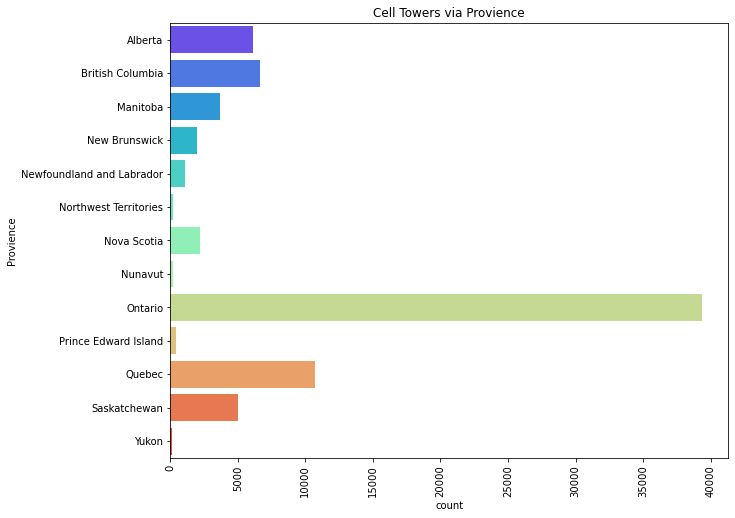

In [42]:
import seaborn as sns
plt.figure(figsize=(10,8))
plt.title('Cell Towers via Provience')
sns.countplot(y=inner_join.Provience, palette='rainbow')
plt.xticks(rotation=90)

In [43]:
City_LIC=data.groupby(['City','LICENSEE'])['LICENSEE'].count().sort_values(ascending=False).reset_index(name='count')

City_LIC

,City,LICENSEE,count
0,Toronto,Bell Canada,5318
1,Toronto,Rogers Communications Canada Inc.,3868
2,Montreal,Rogers Communications Canada Inc.,1738
3,Calgary,Rogers Communications Canada Inc.,1590
4,Quebec City,Rogers Communications Canada Inc.,1371
...,...,...,...
5386,Kedgwick,Ecotel inc.,0
5387,Kedgwick,CITY WEST CABLE AND TELEPHONE CORP,0
5388,Kawartha Lakes,TBayTel,0
5389,Kawartha Lakes,Sasktel Mobility(Cell/PCS),0


In [44]:
inner_join


,LICENSEE,SERVICE,TRANSMIT_FREQ(MHz),RECEIVE_FREQ(MHz),LATITUDE,LONGITUDE,City,PROV,Zip,Country,Distance(Km),Area of Reach( Sq Km),LAST_UPLOAD_DATE,Provience,POPULATION
0,Bell Canada,CELL,882.4,837.4,45.400269,-61.537853,Fox Island Main,NS,B0H,CA,33.18,104.27,2022-04-30,Nova Scotia,519716
1,Bell Canada,CELL,882.4,837.4,44.525492,-64.080831,Fox Island Main,NS,B0J,CA,30.36,95.41,2022-04-30,Nova Scotia,519716
2,Bell Canada,CELL,887.5,842.5,44.940006,-64.905450,Fox Island Main,NS,B0P,CA,31.31,98.41,2022-04-30,Nova Scotia,519716
3,Bell Canada,CELL,882.4,837.4,44.575558,-65.796686,Fox Island Main,NS,B0V,CA,31.19,98.02,2022-04-30,Nova Scotia,519716
4,Bell Canada,CELL,882.4,837.4,44.642933,-65.516008,Fox Island Main,NS,B0S,CA,33.56,105.48,2022-04-30,Nova Scotia,519716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77759,Bell Canada,CELL,882.4,837.4,46.004469,-67.526200,Northampton,NB,E7N,CA,33.85,106.38,2022-04-30,New Brunswick,1724
77760,Rogers Communications Canada Inc.,CELL,871.5,826.5,46.177778,-67.549700,Northampton,NB,E7N,CA,29.28,92.04,2022-04-22,New Brunswick,1724
77761,Rogers Communications Canada Inc.,CELL,871.5,826.5,46.177778,-67.549700,Northampton,NB,E7N,CA,29.28,92.04,2022-04-22,New Brunswick,1724
77762,Rogers Communications Canada Inc.,CELL,870,825,47.646125,-64.875239,Pokemouche,NB,E8P,CA,33.94,106.67,2022-04-22,New Brunswick,7519


## 4. Building Model Now..

In [45]:
# dropping the unnecessery attribute from dataset
Cell_Model = inner_join.drop(labels= ['LICENSEE', 'SERVICE', 'TRANSMIT_FREQ(MHz)', 'RECEIVE_FREQ(MHz)',
       'LATITUDE', 'LONGITUDE', 'PROV', 'Zip', 'Country',
       'Distance(Km)', 'Area of Reach( Sq  Km)', 'LAST_UPLOAD_DATE'], axis = 1)

In [46]:
Cell_Model

,City,Provience,POPULATION
0,Fox Island Main,Nova Scotia,519716
1,Fox Island Main,Nova Scotia,519716
2,Fox Island Main,Nova Scotia,519716
3,Fox Island Main,Nova Scotia,519716
4,Fox Island Main,Nova Scotia,519716
...,...,...,...
77759,Northampton,New Brunswick,1724
77760,Northampton,New Brunswick,1724
77761,Northampton,New Brunswick,1724
77762,Pokemouche,New Brunswick,7519


In [47]:
# Performing Cell Tower Count & displaying under new column...

Cell_Model['Cell Tower Count'] = Cell_Model.groupby(['City',"Provience"])['City'].transform('count')

In [48]:
Cell_Model
Cell_Model.columns

,City,Provience,POPULATION,Cell Tower Count
0,Fox Island Main,Nova Scotia,519716,925
1,Fox Island Main,Nova Scotia,519716,925
2,Fox Island Main,Nova Scotia,519716,925
3,Fox Island Main,Nova Scotia,519716,925
4,Fox Island Main,Nova Scotia,519716,925
...,...,...,...,...
77759,Northampton,New Brunswick,1724,9
77760,Northampton,New Brunswick,1724,9
77761,Northampton,New Brunswick,1724,9
77762,Pokemouche,New Brunswick,7519,2


Index(['City', 'Provience', 'POPULATION', 'Cell Tower Count'], dtype='object')

In [49]:
for ind, row in Cell_Model.iterrows():
    Cell_Model.loc[ind,"Population Coverage"] = (row['Cell Tower Count'] * 1000) - row['POPULATION']

In [50]:
Cell_Model
Cell_Model.columns

,City,Provience,POPULATION,Cell Tower Count,Population Coverage
0,Fox Island Main,Nova Scotia,519716,925,405284.0
1,Fox Island Main,Nova Scotia,519716,925,405284.0
2,Fox Island Main,Nova Scotia,519716,925,405284.0
3,Fox Island Main,Nova Scotia,519716,925,405284.0
4,Fox Island Main,Nova Scotia,519716,925,405284.0
...,...,...,...,...,...
77759,Northampton,New Brunswick,1724,9,7276.0
77760,Northampton,New Brunswick,1724,9,7276.0
77761,Northampton,New Brunswick,1724,9,7276.0
77762,Pokemouche,New Brunswick,7519,2,-5519.0


Index(['City', 'Provience', 'POPULATION', 'Cell Tower Count',
       'Population Coverage'],
      dtype='object')

In [51]:
Cell_Model = Cell_Model.drop_duplicates()

In [52]:
Cell_Model

,City,Provience,POPULATION,Cell Tower Count,Population Coverage
0,Fox Island Main,Nova Scotia,519716,925,405284.0
925,Halifax,Nova Scotia,403131,842,438869.0
1767,Kentville,Nova Scotia,12088,35,22912.0
1802,Port Hawkesbury,Nova Scotia,3214,10,6786.0
1812,Cape Breton,Nova Scotia,94285,169,74715.0
...,...,...,...,...,...
77736,Portugal Cove-St. Philip's,Newfoundland and Labrador,8147,8,-147.0
77744,Chipman,New Brunswick,1104,5,3896.0
77749,McAdam,New Brunswick,1151,4,2849.0
77753,Northampton,New Brunswick,1724,9,7276.0


In [53]:
Cell_Model['Geeen Zone OR Red Zone'] = Cell_Model['Population Coverage'].apply(lambda x: "Green Zone" if x >= 0  else "Red Zone")

In [54]:
Cell_Model
Cell_Model.columns

,City,Provience,POPULATION,Cell Tower Count,Population Coverage,Geeen Zone OR Red Zone
0,Fox Island Main,Nova Scotia,519716,925,405284.0,Green Zone
925,Halifax,Nova Scotia,403131,842,438869.0,Green Zone
1767,Kentville,Nova Scotia,12088,35,22912.0,Green Zone
1802,Port Hawkesbury,Nova Scotia,3214,10,6786.0,Green Zone
1812,Cape Breton,Nova Scotia,94285,169,74715.0,Green Zone
...,...,...,...,...,...,...
77736,Portugal Cove-St. Philip's,Newfoundland and Labrador,8147,8,-147.0,Red Zone
77744,Chipman,New Brunswick,1104,5,3896.0,Green Zone
77749,McAdam,New Brunswick,1151,4,2849.0,Green Zone
77753,Northampton,New Brunswick,1724,9,7276.0,Green Zone


Index(['City', 'Provience', 'POPULATION', 'Cell Tower Count',
       'Population Coverage', 'Geeen Zone OR Red Zone'],
      dtype='object')

In [55]:
Cell_Model['Recommend Towers'] = Cell_Model['Population Coverage'].apply(lambda x: 'NA' if x>= 0  else abs(round(x/1000)))

In [56]:
Cell_Model.head(10)
Cell_Model.tail(10)

,City,Provience,POPULATION,Cell Tower Count,Population Coverage,Geeen Zone OR Red Zone,Recommend Towers
0,Fox Island Main,Nova Scotia,519716,925,405284.0,Green Zone,NA
925,Halifax,Nova Scotia,403131,842,438869.0,Green Zone,NA
1767,Kentville,Nova Scotia,12088,35,22912.0,Green Zone,NA
1802,Port Hawkesbury,Nova Scotia,3214,10,6786.0,Green Zone,NA
1812,Cape Breton,Nova Scotia,94285,169,74715.0,Green Zone,NA
1981,Bridgewater,Nova Scotia,8532,40,31468.0,Green Zone,NA
2021,Truro,Nova Scotia,12826,20,7174.0,Green Zone,NA
2041,New Glasgow,Nova Scotia,20609,33,12391.0,Green Zone,NA
2074,Amherst,Nova Scotia,9550,23,13450.0,Green Zone,NA
2097,Eskasoni 3,Nova Scotia,20061,6,-14061.0,Red Zone,14


,City,Provience,POPULATION,Cell Tower Count,Population Coverage,Geeen Zone OR Red Zone,Recommend Towers
77700,Saint-Jacques,New Brunswick,16580,6,-10580.0,Red Zone,11
77706,Wilmot,New Brunswick,1022,8,6978.0,Green Zone,NA
77714,Perth,New Brunswick,1471,9,7529.0,Green Zone,NA
77723,Cap Pele,New Brunswick,6376,6,-376.0,Red Zone,0
77729,Shippegan,New Brunswick,4800,7,2200.0,Green Zone,NA
77736,Portugal Cove-St. Philip's,Newfoundland and Labrador,8147,8,-147.0,Red Zone,0
77744,Chipman,New Brunswick,1104,5,3896.0,Green Zone,NA
77749,McAdam,New Brunswick,1151,4,2849.0,Green Zone,NA
77753,Northampton,New Brunswick,1724,9,7276.0,Green Zone,NA
77762,Pokemouche,New Brunswick,7519,2,-5519.0,Red Zone,6


In [57]:
Cell_Model['Recommend Towers'] = Cell_Model['Recommend Towers'].astype('str')

## 5. Saving dataset after Data Manuplation

### 5.1 Saving dataset after Data Manuplation to MS SQL Server

In [58]:
inner_join.to_sql('Inner-Join_Dataset', con=engine, if_exists='append', index=False, chunksize=50, method='multi')

In [59]:
Cell_Model.to_sql('MODEL_Cell', con=engine, if_exists='append', index=False, chunksize=5, method='multi')

### 5.2 Saving dataset after Data Manuplation to CSV

In [62]:
inner_join.to_csv('C:\\Users\\aksha\\OneDrive - St. Clair College\\Semester 4\\DAB402 - CAPSTONE PROJECT\\FINAL_WORK\\PowerBI_Merged_Dataset_29.csv',index=False)

In [63]:
Cell_Model.to_csv('C:\\Users\\aksha\\OneDrive - St. Clair College\\Semester 4\\DAB402 - CAPSTONE PROJECT\\FINAL_WORK\\Cell_Model29.csv',index=False)